In [1]:
# Standard scientific Python imports
%matplotlib inline
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets

In [2]:
# The digits dataset for training
digits = datasets.load_digits()

# The data is made of 8x8 images of digits
# zip the image and label (dependent variable) together
images_and_labels = list(zip(digits.images, digits.target))

In [5]:
# To apply a classifier on this data, we need to flatten the image
# Turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print(f'N={len(data)}, M={len(data[0])}')


N=1797, M=64


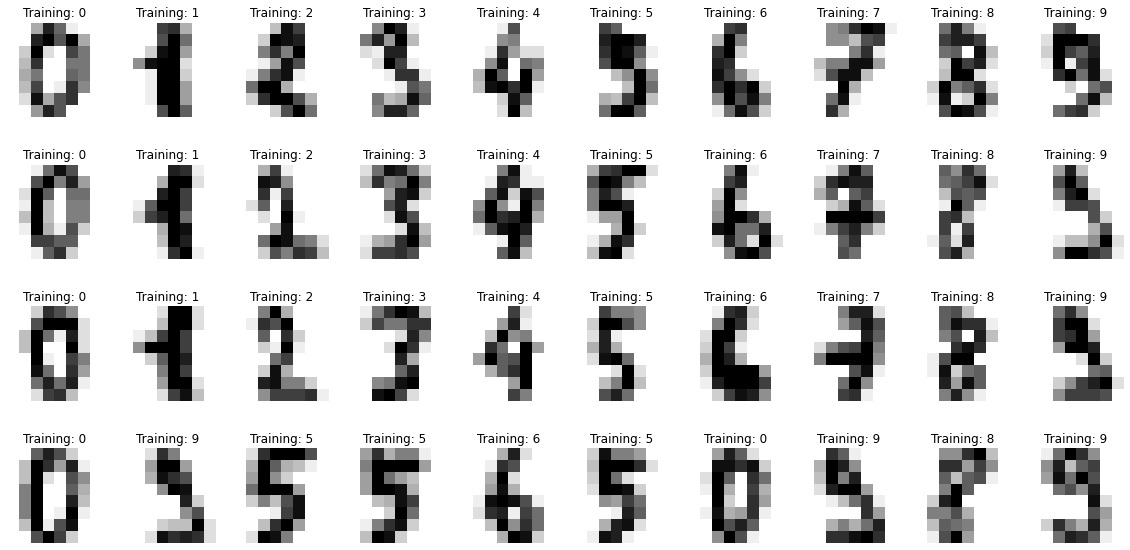

In [6]:
# Draw the first 40 data points - in this case a single data point is an image
plt.figure(1, figsize=(20, 10))
for index, (image, label) in enumerate(images_and_labels[:40]):
    plt.subplot(4, 10, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Training: {label}')

In [15]:
from sklearn import svm, metrics

# Create a classifier: a support vector classifier
# gamma is normally determined using a hyperparameter search which would need a validation dataset
classifier = svm.SVC(gamma=0.003)

# Learn the digits on the first half of the digits - 50% data is used as the training set
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Predict the value of the digit on the second half
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [16]:
%%time

acc = metrics.accuracy_score(expected, predicted)

print(f'Classification report for classifier {classifier}:\nAccuracy={acc:.3f}\n')

Classification report for classifier SVC(gamma=0.003):
Accuracy=0.950

CPU times: user 1.65 ms, sys: 1.03 ms, total: 2.68 ms
Wall time: 1.78 ms
